# 04. The Ames 주택 데이터

In [5]:
library(tidyverse)
library(tidymodels)
ggplot2::theme_set(theme_bw())
tidymodels_prefer()

In [3]:
library(modeldata)
data(ames)
ames %>% dim

[1] 2930   74

# 
#### 히스토그램

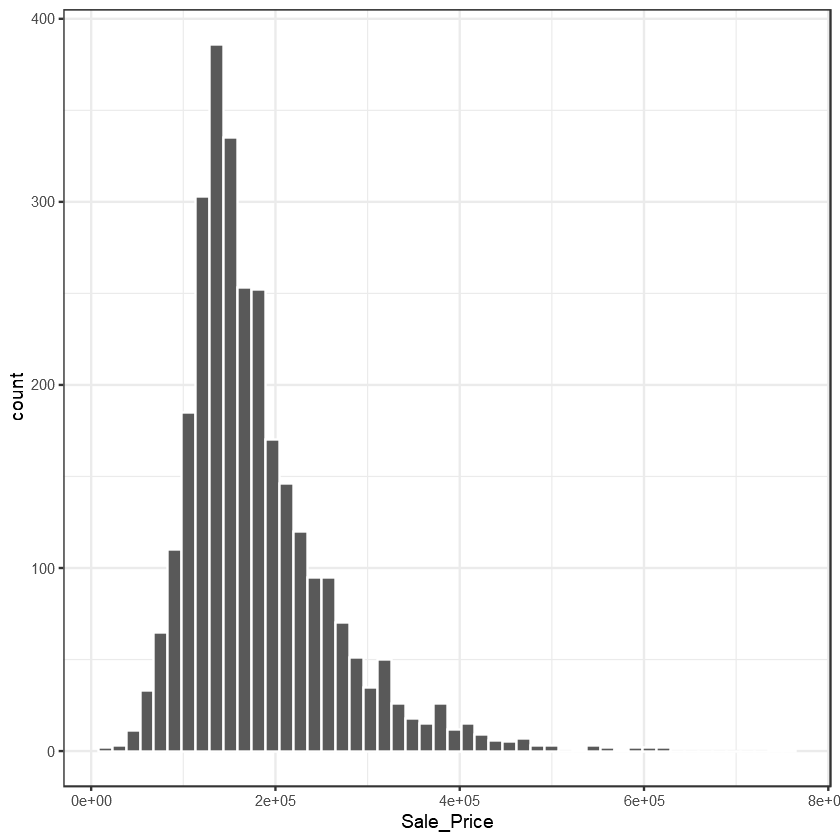

In [9]:
ggplot(ames, aes(Sale_Price)) + 
    geom_histogram(bins = 50, col = "white")

# 
#### 로그 변환 히스토그램

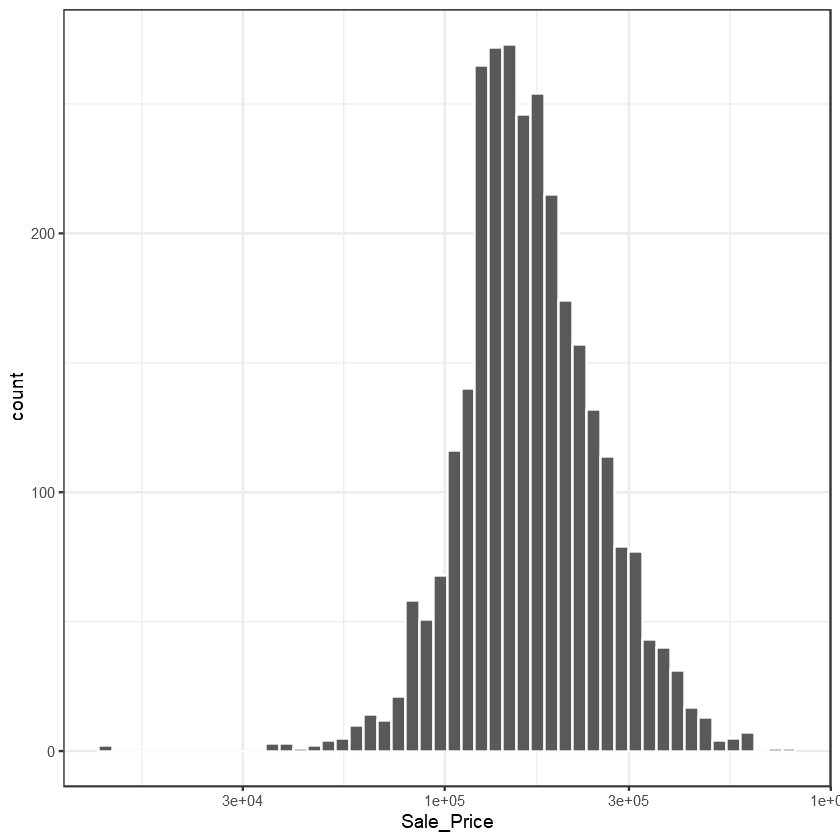

In [10]:
ggplot(ames, aes(Sale_Price)) + 
    geom_histogram(bins = 50, col = "white") + 
    scale_x_log10()

 #### 매매 가격 분포는 오른쪽으로 치우쳐 있으며 분포 중심의 양쪽에 값비싼 집보다 비싼 집이 비례

In [11]:
ames <- ames %>% mutate(Sale_Price = log10(Sale_Price))

# 
# 
# 
## 05. 데이터 사용

### ```rsample::initial_split()```
### ```rsample::initial_time_split()```

In [16]:
set.seed(20221010)
ames_split <- initial_split(ames, prop = 0.8)
ames_train <- training(ames_split)
ames_test <- testing(ames_split)
ames_train %>% dim ; ames_test %>% dim

[1] 2344   74

[1] 586  74

# 
### ```density()``` : 커널 밀도 추정

In [42]:
sale_dens <- density(ames$Sale_Price, n = 2^10) %>% tidy() 
sale_dens %>% head()

x,y
<dbl>,<dbl>
4.018202,6.877398e-05
4.020107,8.361662e-05
4.022012,1.012086e-04
4.023916,1.219617e-04
4.025821,1.468546e-04
4.027725,1.761054e-04


In [44]:
quantiles <- quantile(ames$Sale_Price, probs = c(1:3) / 4)
quantiles <- tibble(prob = (1:3 / 4), value = unname(quantiles))
quantiles
quantiles$y <- approx(sale_dens$x, sale_dens$y, xout = quantiles$value)$y
quantiles

prob,value
<dbl>,<dbl>
0.25,5.112270
0.50,5.204120
0.75,5.329398


prob,value,y
<dbl>,<dbl>,<dbl>
0.25,5.112270,2.421681
0.50,5.204120,2.362820
0.75,5.329398,1.590627


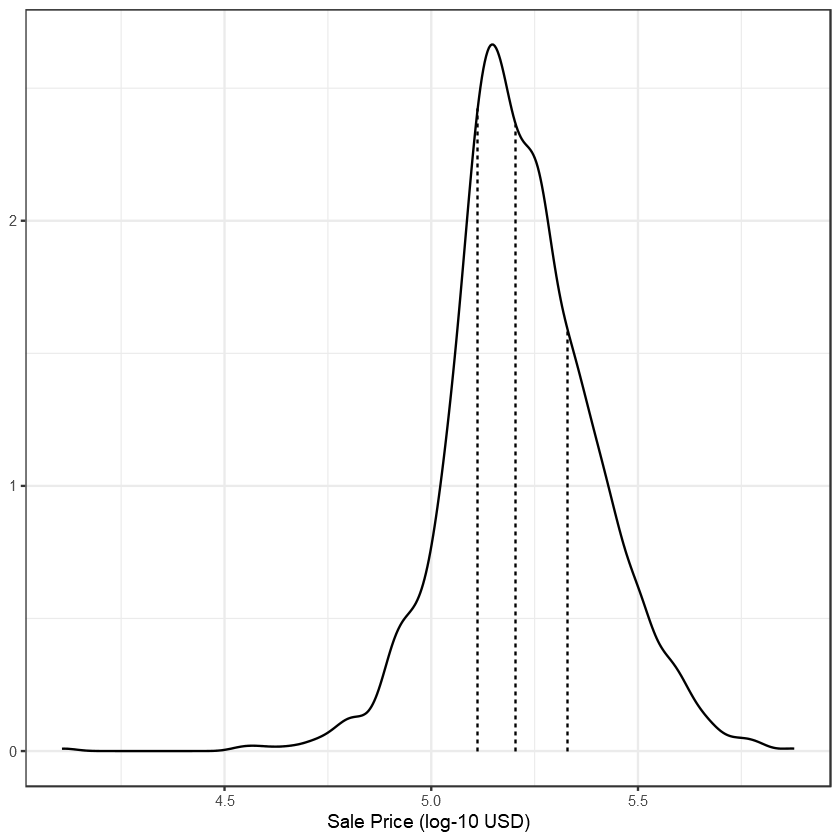

In [19]:
(quart_plot <-
    ggplot(ames, aes(x = Sale_Price)) +
    geom_line(stat = "density") +
    geom_segment(data = quartiles,
                 aes(x = value, xend = value, y = 0, yend = y),
                 lty = 2) +
    labs(x = "Sale Price (log-10 USD)", y = NULL))

# 
# 

In [48]:
set.seed(20221010)
ames_split <- initial_split(ames, prop = 0.8, strata = Sale_Price)
ames_train <- training(ames_split)
ames_test <- testing(ames_split)
ames_train %>% dim ; ames_test %>% dim

[1] 2342   74

[1] 588  74